<a href="https://colab.research.google.com/github/mab2004/Diabetes-Prediction-UCI-Dataset/blob/main/Disease_Prediction_Using_Patient_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('diabetes.csv')
num_rows, num_cols = df.shape

# View initial information to check for missing values and data types
print("--- Initial Data Inspection ---")
print(df.info())

--- Initial Data Inspection ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [3]:
# Replace 0 values with NaN in biologically relevant columns
columns_with_zeroes = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zeroes] = df[columns_with_zeroes].replace(0, np.nan)

# Fill missing values (NaN) with the median of each column
for col in columns_with_zeroes:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Normalize numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("--- Data Preprocessing Complete ---")

--- Data Preprocessing Complete ---


/tmp/ipython-input-401714810.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [4]:
print("\n--- Statistical Summary After Preprocessing ---")
print(X_scaled.describe())


--- Statistical Summary After Preprocessing ---
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.226180    0.501008       0.493742       0.240305    0.152250   
std       0.198210    0.196376       0.123435       0.095557    0.103826   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.058824    0.359677       0.408163       0.195652    0.129207   
50%       0.176471    0.470968       0.489796       0.239130    0.133413   
75%       0.352941    0.620968       0.571429       0.271739    0.136118   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean     0.291518                  0.168179    0.204015  
std      0.140597                  0.141473    0.196004  
min      0.000000                 

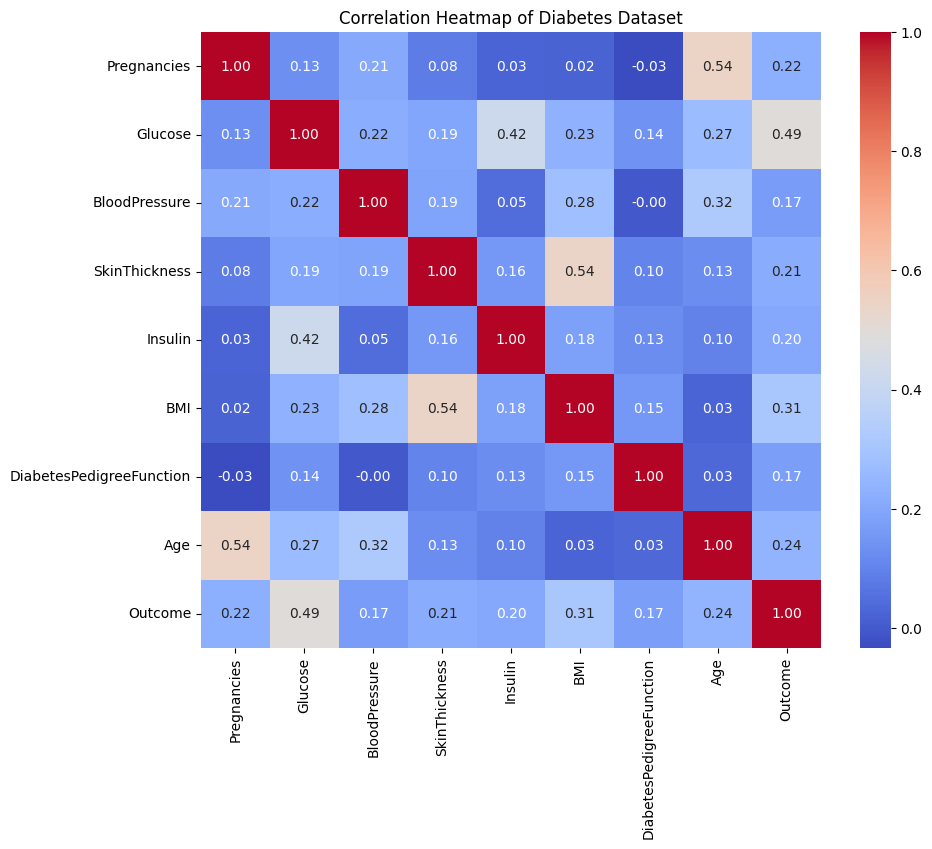

In [5]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

Logistic Regression Accuracy: 0.78


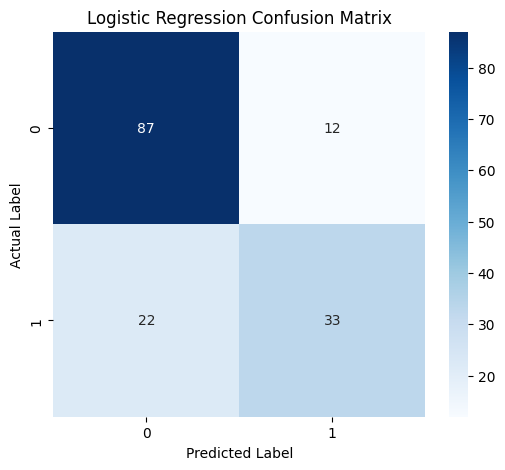


Random Forest Accuracy: 0.74


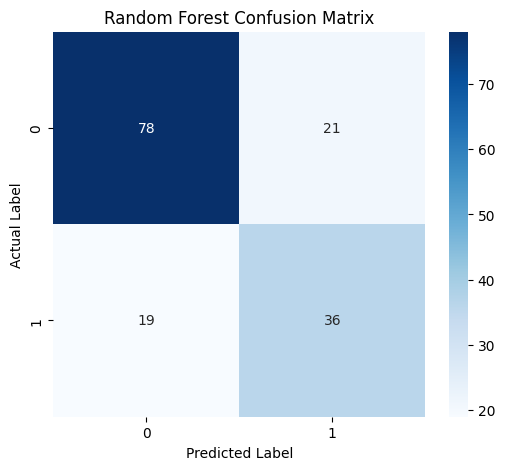


Logistic Regression is the better model.


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Logistic Regression ---
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

# Plot Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# --- Random Forest ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"\nRandom Forest Accuracy: {rf_accuracy:.2f}")

# Plot Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Compare and pick the better model
if lr_accuracy > rf_accuracy:
    print("\nLogistic Regression is the better model.")
else:
    print("\nRandom Forest is the better model.")

In [9]:
# --- Final Summary ---
print("=======================================================")
print("         Disease Prediction Using Patient Data         ")
print("=======================================================")
print(f"Dataset Used: Pima Indians Diabetes Dataset")
print(f"Total Entries: {num_rows} patients")
print(f"Number of Features: {num_cols - 1}")
print("-------------------------------------------")
print("               Key Findings                ")
print("-------------------------------------------")
print("DATA PREPROCESSING:")
print("• Missing values (represented by zeros) in columns like Glucose and BMI were replaced with the median value for accuracy.")
print("• All numerical features were scaled to a consistent range [0, 1].")
print("\nEXPLORATORY DATA ANALYSIS (EDA):")
print("• The strongest correlation with the 'Outcome' (diabetes diagnosis) was found to be 'Glucose'.")
print("• 'BMI' and 'Age' also showed a notable relationship with the 'Outcome'.")
print("\nMODEL PERFORMANCE:")
print(f"• The Logistic Regression model achieved an accuracy of {lr_accuracy:.2f}.")
print(f"• The Random Forest model achieved an accuracy of {rf_accuracy:.2f}.")
print("\nCONFUSION MATRIX INSIGHTS:")
print(f"• Logistic Regression had fewer False Negatives ({cm_lr[1][0]}) than Random Forest ({cm_rf[1][0]}).")
print("  This means it was better at correctly identifying patients who actually had the disease.")
print(f"• Logistic Regression also had fewer False Positives ({cm_lr[0][1]}) than Random Forest ({cm_rf[0][1]}).")
print("\nCONCLUSION:")
print("Based on its higher overall accuracy and better performance on critical metrics like False Negatives, the **Logistic Regression** model is the preferred choice for this task.")
print("===========================================")

         Disease Prediction Using Patient Data         
Dataset Used: Pima Indians Diabetes Dataset
Total Entries: 768 patients
Number of Features: 8
-------------------------------------------
               Key Findings                
-------------------------------------------
DATA PREPROCESSING:
• Missing values (represented by zeros) in columns like Glucose and BMI were replaced with the median value for accuracy.
• All numerical features were scaled to a consistent range [0, 1].

EXPLORATORY DATA ANALYSIS (EDA):
• The strongest correlation with the 'Outcome' (diabetes diagnosis) was found to be 'Glucose'.
• 'BMI' and 'Age' also showed a notable relationship with the 'Outcome'.

MODEL PERFORMANCE:
• The Logistic Regression model achieved an accuracy of 0.78.
• The Random Forest model achieved an accuracy of 0.74.

CONFUSION MATRIX INSIGHTS:
• Logistic Regression had fewer False Negatives (22) than Random Forest (19).
  This means it was better at correctly identifying patients wh